In [72]:

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [73]:
url="D:\Data Science\My All Project\Supermarket_sales_Data Analysis 1\Project 2\Sales data_2019_exported.csv"
df=pd.read_csv(url)

df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700.00,2/18/2019 1:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,2/13/2019 7:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,2/18/2019 9:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,2/2/2019 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,2/28/2019 20:32,"548 Lincoln St, Seattle, WA 98101"


### What is the total number of sales?

In [74]:
print('Total Sales Product:',df['Quantity Ordered'].sum())

print('Total Sales Amount:',df['Price Each'].sum())

Total Sales Product: 209079
Total Sales Amount: 34289130.68


### What is the average sales per month? 

In [75]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df_sorted = df.sort_values(by="Order Date")
df_sorted.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
127157,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001"
127967,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016"
129320,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001"
129974,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001"
129327,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301"


The average sales per month is: $ 2637625.44


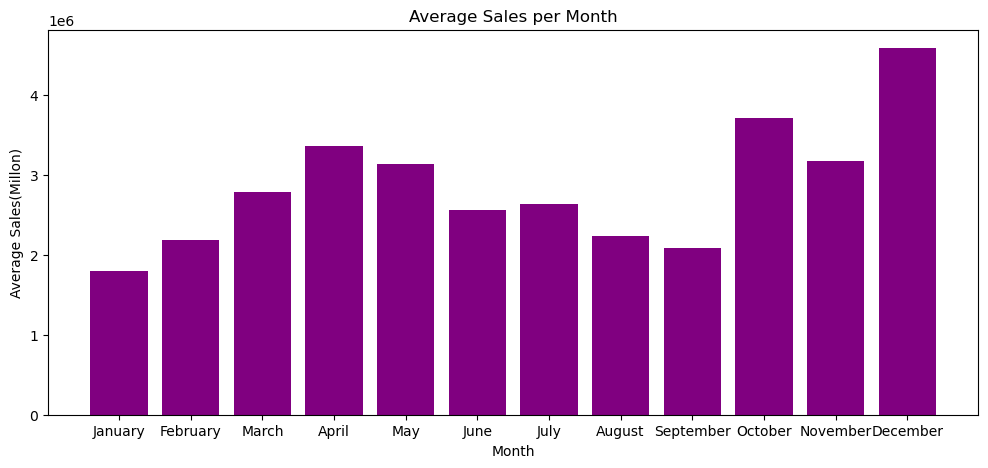

In [76]:

# Group the sales data by month and calculate the total sales for each month
monthly_sales = df.groupby(pd.Grouper(key="Order Date", freq="M")).sum()

# Calculate the average sales per month
average_sales = monthly_sales.mean()["Price Each"]

print("The average sales per month is: $", round(average_sales, 2))

 #Create a bar chart of the average sales per month
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(monthly_sales.index.strftime("%B"), monthly_sales["Price Each"],color='purple')
ax.set_title("Average Sales per Month")
ax.set_xlabel("Month")
ax.set_ylabel("Average Sales(Millon)")
plt.show()


### What is the monthly revenue?

In [77]:
monthly_sales = df.groupby(pd.Grouper(key="Order Date", freq="M")).sum()

print(monthly_sales)

              Order ID  Quantity Ordered  Price Each
Order Date                                          
2019-01-31  1411189528             10862  1803264.98
2019-02-28  1871052592             13449  2188884.72
2019-03-31  2564810956             17005  2791207.83
2019-04-30  3387347100             20558  3367671.02
2019-05-31  3345871523             18667  3135125.13
2019-06-30  2932976072             15253  2562025.61
2019-07-31  3284139576             16072  2632539.56
2019-08-31  2899373917             13448  2230345.42
2019-09-30  2948726831             13109  2084992.09
2019-10-31  5457110383             22703  3715554.83
2019-11-30  5047202573             19798  3180600.68
2019-12-31  7685904705             28114  4588415.41
2020-01-31    10441270                41     8503.40


### What are the key demographics of the customers?

In [78]:
df['Purchase Address'] = df['Purchase Address'].fillna('')
df['Town'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip() if len(x.split(','))>1 else '')
town_sales = df.groupby('Town').agg({'Order ID': 'nunique'})
town_sales = town_sales.sort_values('Order ID', ascending=True)
print(town_sales)

               Order ID
Town                   
                      1
Austin             9509
Portland          11980
Seattle           14119
Dallas            14240
Atlanta           14253
Boston            19092
New York City     23848
Los Angeles       28498
San Francisco     42898


### Which market (country) generated the most sales on average?

               Price Each  Order ID
Town                               
                     0.00         1
Austin         1809873.61      9509
Portland       2307747.47     11980
Seattle        2733296.01     14119
Dallas         2752627.82     14240
Atlanta        2779908.20     14253
Boston         3637409.77     19092
New York City  4635370.83     23848
Los Angeles    5421435.23     28498
San Francisco  8211461.74     42898


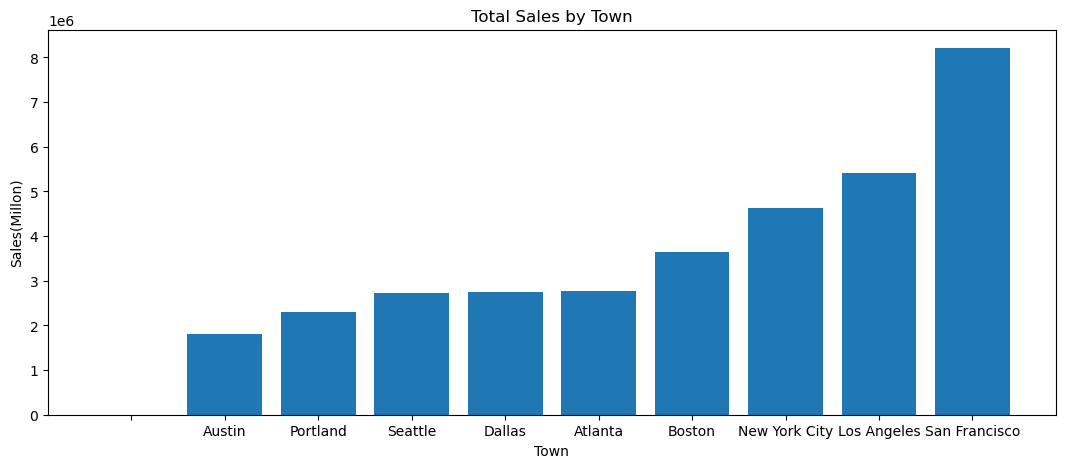

In [79]:
df['Purchase Address'] = df['Purchase Address'].fillna('')

df['Town'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip() if len(x.split(','))>1 else '')

# Group the sales data by country and calculate the total sales and number of orders for each country
town_sales = df.groupby('Town').agg({'Price Each': 'sum', 'Order ID': 'nunique'})
town_sales = town_sales.sort_values('Order ID', ascending=True)

print(town_sales)
plt.figure(figsize=(13,5))
plt.bar(town_sales.index, town_sales['Price Each'])
plt.title('Total Sales by Town')
plt.xlabel('Town')
plt.ylabel('Sales(Millon)')
plt.show()


### When were the best- and worst-selling periods?

In [80]:
monthly_sales = df.groupby(pd.Grouper(key="Order Date", freq="M")).sum()
max_permonth=monthly_sales.max()
min_permonth=monthly_sales.min()


pd.options.display.float_format = '{:.2f}'.format

# Calculate monthly sales
monthly_sales = df.groupby(pd.Grouper(key="Order Date", freq="M")).sum()

# Find the month with minimum sales
min_month = monthly_sales['Price Each'].idxmin()

# Print the result
print(f"The month with the minimum sales is {min_month.strftime('%B %Y')}.")
print('\n')
print(max_permonth)
print('\n')
# Calculate monthly sales
monthly_sales = df.groupby(pd.Grouper(key="Order Date", freq="M")).sum()

# Find the month with minimum sales
min_month = monthly_sales['Price Each'].idxmin()

# Print the result
print(f"The month with the minimum sales is {min_month.strftime('%B %Y')}.")
print('\n')
print(min_permonth)

The month with the minimum sales is January 2020.


Order ID           7685904705.00
Quantity Ordered        28114.00
Price Each            4588415.41
dtype: float64


The month with the minimum sales is January 2020.


Order ID           10441270.00
Quantity Ordered         41.00
Price Each             8503.40
dtype: float64


In [81]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Town
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",Portland
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",San Francisco
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",New York City
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",Atlanta
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",Seattle


### Which products sell best? 

In [82]:

product_best_sell=df.groupby('Product').agg({'Quantity Ordered':'sum'})

product_best_sell=product_best_sell.sort_values('Quantity Ordered',ascending=True)


product_best_sell_max=product_best_sell.max()


print('Product name:',product_best_sell.idxmax())
print('Total sell Product:',product_best_sell_max)


Product name: Quantity Ordered    AAA Batteries (4-pack)
dtype: object
Total sell Product: Quantity Ordered    31017
dtype: int64


### Which products should the company order more or less of?

In [83]:

product_best_sell=df.groupby('Product').agg({'Quantity Ordered':'sum'})

product_best_sell=product_best_sell.sort_values('Quantity Ordered',ascending=True)



df_filtered = df[df['Product'] == 'Product']
df_filtered = df_filtered.replace(' ', '')

product_best_sell_max=product_best_sell.min()

print('Product name:',product_best_sell.idxmin())
print('Total sell Product:',product_best_sell_max)


Product name: Quantity Ordered    Product
dtype: object
Total sell Product: Quantity Ordered    0
dtype: int64
